#**MobileNetV2**

###📥 **Import Libraries**

In [ ]:
# mount drive
from google.colab import drive
drive.mount('/content/drive')

# common library
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# tensor computation
from tensorflow.random import set_seed
from keras.preprocessing.image import ImageDataGenerator
from keras.layers import Input, Conv2D, MaxPooling2D, Flatten, Dense
from keras.utils import plot_model
from keras.models import Model, load_model
from keras.applications import MobileNetV2

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


###🔒 **Inisialisasi Bilangan Random**

In [ ]:
def set_random(seed):
  np.random.seed(seed)
  set_seed(seed)

set_random(2022)

###🪆 **Data Augmentation**

In [ ]:
# file directory
file_dir = '/content/drive/Shareddrives/Teman Tapi Mining/Satria Data/2022/'
data_dir = 'data/Garbage classification/Garbage classification/'
dir = file_dir + data_dir

# train generator
train = ImageDataGenerator(
    horizontal_flip = True, vertical_flip = True,
    validation_split = 0.1, rescale = 1./255,
    shear_range = 0.1, zoom_range = 0.1,
    width_shift_range = 0.1, height_shift_range = 0.1
    )
train_generator = train.flow_from_directory(
    dir, target_size = (512, 384), batch_size = 32,
    class_mode = 'categorical', subset = 'training'
    )

# test generator
test = ImageDataGenerator(rescale = 1./255, validation_split = 0.1)
test_generator = test.flow_from_directory(
    dir, target_size = (512, 384), batch_size = 32,
    class_mode = 'categorical', subset = 'validation'
    )

Found 2276 images belonging to 6 classes.
Found 251 images belonging to 6 classes.


###🎯 **Modeling**

In [ ]:
pretrained = MobileNetV2(input_shape = (512, 384, 3), include_top = False, weights = 'imagenet')
pretrained.trainable = False
layers = Flatten()(pretrained.output)
layers = Dense(64, activation = 'relu')(layers)
outputs = Dense(6, activation = 'softmax')(layers)
model = Model(inputs = [pretrained.input], outputs = [outputs])

model.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])
model.summary()

9406464/9406464 [==============================] - 0s 0us/step
Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 512, 384, 3  0           []                               
                                )]                                                                
                                                                                                  
 Conv1 (Conv2D)                 (None, 256, 192, 32  864         ['input_1[0][0]']                
                                )                                                                 
                                                                                                  
 bn_Conv1 (BatchNormalization)  (None, 256, 192, 32  128         ['Conv1[0][0]']                  
                               

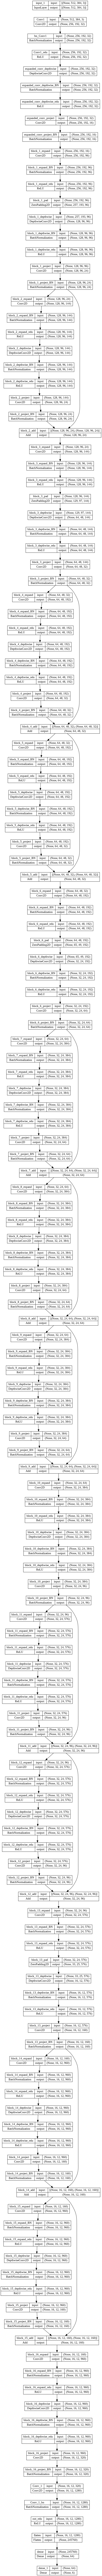

In [ ]:
plot_model(model, show_shapes = True)

In [ ]:
# define parameters
batch_size = 32
num_epochs = 100

# train & test steps
step_size_train = train_generator.n//train_generator.batch_size
step_size_test = test_generator.n//test_generator.batch_size

In [ ]:
history = model.fit(
    train_generator, epochs = num_epochs, steps_per_epoch = step_size_train,
    validation_data = test_generator, validation_steps = step_size_test
    )

Epoch 1/100
71/71 [==============================] - 800s 11s/step - loss: 3.1602 - accuracy: 0.5588 - val_loss: 1.1685 - val_accuracy: 0.5804
Epoch 2/100
71/71 [==============================] - 92s 1s/step - loss: 1.0704 - accuracy: 0.6404 - val_loss: 1.1506 - val_accuracy: 0.6071
Epoch 3/100
71/71 [==============================] - 92s 1s/step - loss: 0.9905 - accuracy: 0.6462 - val_loss: 1.0669 - val_accuracy: 0.6875
Epoch 4/100
71/71 [==============================] - 92s 1s/step - loss: 0.9588 - accuracy: 0.6988 - val_loss: 1.0712 - val_accuracy: 0.6339
Epoch 5/100
71/71 [==============================] - 91s 1s/step - loss: 0.8169 - accuracy: 0.7317 - val_loss: 0.8632 - val_accuracy: 0.6741
Epoch 6/100
71/71 [==============================] - 91s 1s/step - loss: 0.6502 - accuracy: 0.7732 - val_loss: 0.7823 - val_accuracy: 0.7500
Epoch 7/100
71/71 [==============================] - 92s 1s/step - loss: 0.6365 - accuracy: 0.7799 - val_loss: 0.9304 - val_accuracy: 0.7366
Epoch 8/100

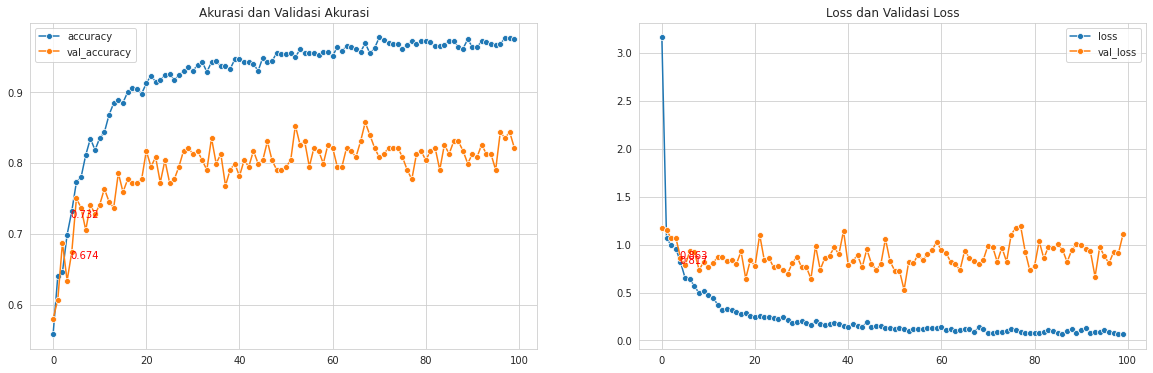

In [ ]:
sns.set_style(style = 'whitegrid')

fig, axes = plt.subplots(1, 2, figsize=(20, 6))
graph = ['accuracy', 'loss']
title = ["Akurasi dan Validasi Akurasi", "Loss dan Validasi Loss"]

def draw_graph(i, text, title):
  axes[i].set_title(title)
  fig = sns.lineplot(ax = axes[i], x = history.epoch, y = history.history[text], marker = 'o')
  fig = sns.lineplot(ax = axes[i], x = history.epoch, y = history.history[f'val_{text}'], marker = 'o')
  axes[i].legend([text, f'val_{text}'])

def text_graph(i, text):
  for j, (x, y) in enumerate(zip(history.epoch, history.history[f'{text}'])):
    if j == 4:
      axes[i].text(x = x - 0.2, y = y - 0.009, s = round(y, 3), color = 'red') 
  for j, (x, y) in enumerate(zip(history.epoch, history.history[f'val_{text}'])):
    if j == 4:
      axes[i].text(x = x - 0.2, y = y - 0.009, s = round(y, 3), color = 'red') 

for i, (val, tit) in enumerate(zip(graph, title)):
    draw_graph(i, val, tit)
    text_graph(i, val)

In [ ]:
# save & load model
model.save(file_dir + 'model/MobileNetV2.h5')
model = load_model(file_dir + 'model/MobileNetV2.h5')

In [ ]:
# train evaluation
train_eval = model.evaluate(train_generator)
for name, value in zip(model.metrics_names, train_eval):
  print(name, ':', value)
print()

72/72 [==============================] - 1716s 24s/step - loss: 0.0694 - accuracy: 0.9750
loss : 0.06939752399921417
accuracy : 0.9749560356140137



In [ ]:
# test evaluation
test_eval = model.evaluate(test_generator)
for name, value in zip(model.metrics_names, test_eval):
  print(name, ':', value)
print()

8/8 [==============================] - 3s 401ms/step - loss: 1.1188 - accuracy: 0.8167
loss : 1.118838906288147
accuracy : 0.8167330622673035

